### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Load data

In [2]:
white_wine= pd.read_csv('winequality-white.csv', sep=';')
red_wine= pd.read_csv('winequality-red.csv', sep=';')

### Merge datasets

In [3]:
red_wine['quality_label']= red_wine['quality'].apply(lambda x: 'low' if x<=5 else 'medium' if x<=7 else 'high')
white_wine['quality_label']= white_wine['quality'].apply(lambda x: 'low' if x<=5 else 'medium' if x<=7 else 'high')


red_wine['wine_type']='red'
white_wine['wine_type']='white'

wines=pd.concat([red_wine, white_wine])
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

wines.to_csv('wines.csv',index=False)

### Data features and types of data

In [4]:
wines.info()
wines.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  quality_label         6497 non-null   object 
 13  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,high,white
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,low,red
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,medium,white
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,medium,white
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,medium,white


## Exploratory data analysis

### Descriptive Statistics for wine type

In [5]:
attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']
red_wine_subset=red_wine[attributes].describe()
white_wine_subset=red_wine[attributes].describe()

pd.concat([red_wine_subset,white_wine_subset], axis=1, keys=['Red wine','White wine'])

Red wine                                                 \
      residual sugar total sulfur dioxide    sulphates      alcohol   
count    1599.000000          1599.000000  1599.000000  1599.000000   
mean        2.538806            46.467792     0.658149    10.422983   
std         1.409928            32.895324     0.169507     1.065668   
min         0.900000             6.000000     0.330000     8.400000   
25%         1.900000            22.000000     0.550000     9.500000   
50%         2.200000            38.000000     0.620000    10.200000   
75%         2.600000            62.000000     0.730000    11.100000   
max        15.500000           289.000000     2.000000    14.900000   

                                        White wine                       \
      volatile acidity      quality residual sugar total sulfur dioxide   
count      1599.000000  1599.000000    1599.000000          1599.000000   
mean          0.527821     5.636023       2.538806            46.467792   
std           0.179060     0.807569       1.409928            32.895324   
min           0.120000     3.000000       0.900000             6.000000   
25%           0.390000     5.000000       1.900000            22.000000   
50%           0.520000     6.000000       2.200000            38.000000   
75%           0.640000     6.000000       2.600000            62.000000   
max           1.580000     8.000000      15.500000           289.000000   

                                                               
         sulphates      alcohol volatile acidity      quality  
count  1599.000000  1599.000000      1599.000000  1599.000000  
mean      0.658149    10.422983         0.527821     5.636023  
std       0.169507     1.065668         0.179060     0.807569  
min       0.330000     8.400000         0.120000     3.000000  
25%       0.550000     9.500000         0.390000     5.000000  
50%       0.620000    10.200000         0.520000     6.000000  
75%       0.730000    11.100000         0.640000     6.000000  
max       2.000000    14.900000         1.580000     8.000000

### Descriptive Statistics for wine quality

In [6]:
attributes = ['alcohol', 'volatile acidity', 'pH', 'quality']
low_quality = wines[wines['quality_label'] == 'low'][attributes].describe()
medium_quality = wines[wines['quality_label'] == 'medium'][attributes].describe()
high_quality = wines[wines['quality_label'] == 'high'][attributes].describe()

pd.concat([low_quality, medium_quality, high_quality],axis=1,keys=['Low quality','Medium quality','High quality'])

Low quality                                            Medium quality  \
           alcohol volatile acidity           pH      quality        alcohol   
count  2384.000000      2384.000000  2384.000000  2384.000000    3915.000000   
mean      9.873544         0.397410     3.214522     4.884228      10.807612   
std       0.841746         0.187971     0.161311     0.357197       1.201098   
min       8.000000         0.100000     2.740000     3.000000       8.400000   
25%       9.300000         0.260000     3.110000     5.000000       9.800000   
50%       9.600000         0.337500     3.200000     5.000000      10.800000   
75%      10.400000         0.500000     3.310000     5.000000      11.700000   
max      14.900000         1.580000     3.900000     5.000000      14.200000   

                                                 High quality  \
      volatile acidity           pH      quality      alcohol   
count      3915.000000  3915.000000  3915.000000   198.000000   
mean          0.306955     3.220577     6.275607    11.691414   
std           0.139826     0.160674     0.446877     1.273262   
min           0.080000     2.720000     6.000000     8.500000   
25%           0.210000     3.110000     6.000000    11.000000   
50%           0.270000     3.210000     6.000000    12.000000   
75%           0.360000     3.330000     7.000000    12.600000   
max           1.040000     4.010000     7.000000    14.000000   

                                                
      volatile acidity          pH     quality  
count       198.000000  198.000000  198.000000  
mean          0.291187    3.225354    8.025253  
std           0.118123    0.156431    0.157289  
min           0.120000    2.880000    8.000000  
25%           0.210000    3.130000    8.000000  
50%           0.275000    3.230000    8.000000  
75%           0.350000    3.330000    8.000000  
max           0.850000    3.720000    9.000000

### Distributions of features

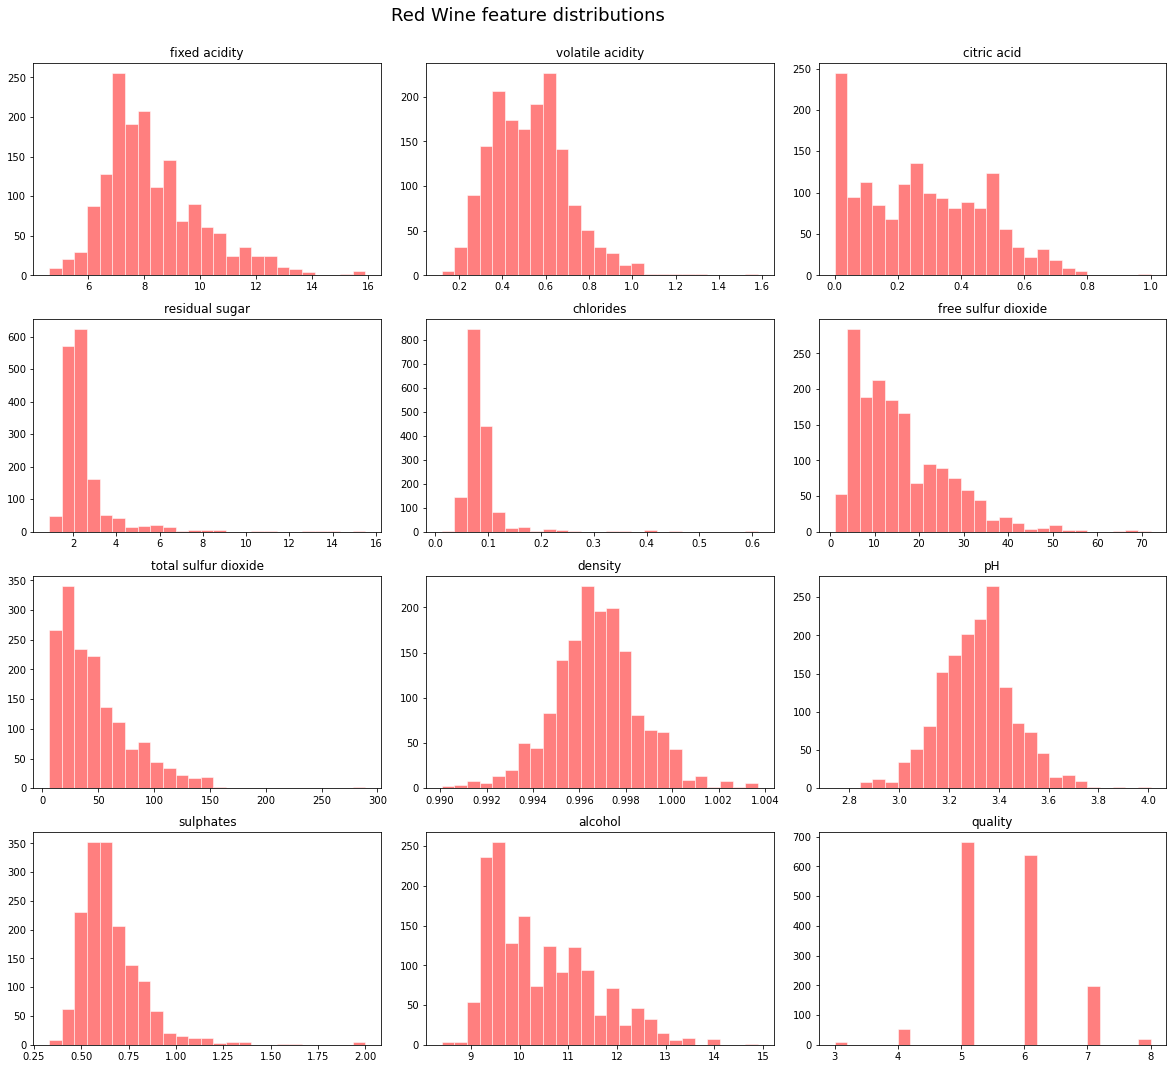

In [16]:
red_wine.hist(bins=25, alpha=0.5, color='r',edgecolor='w',grid=False, figsize=[16.4, 14.8])
plt.suptitle('Red Wine feature distributions', x=0.45, y=1, fontsize=18) 
plt.tight_layout() 

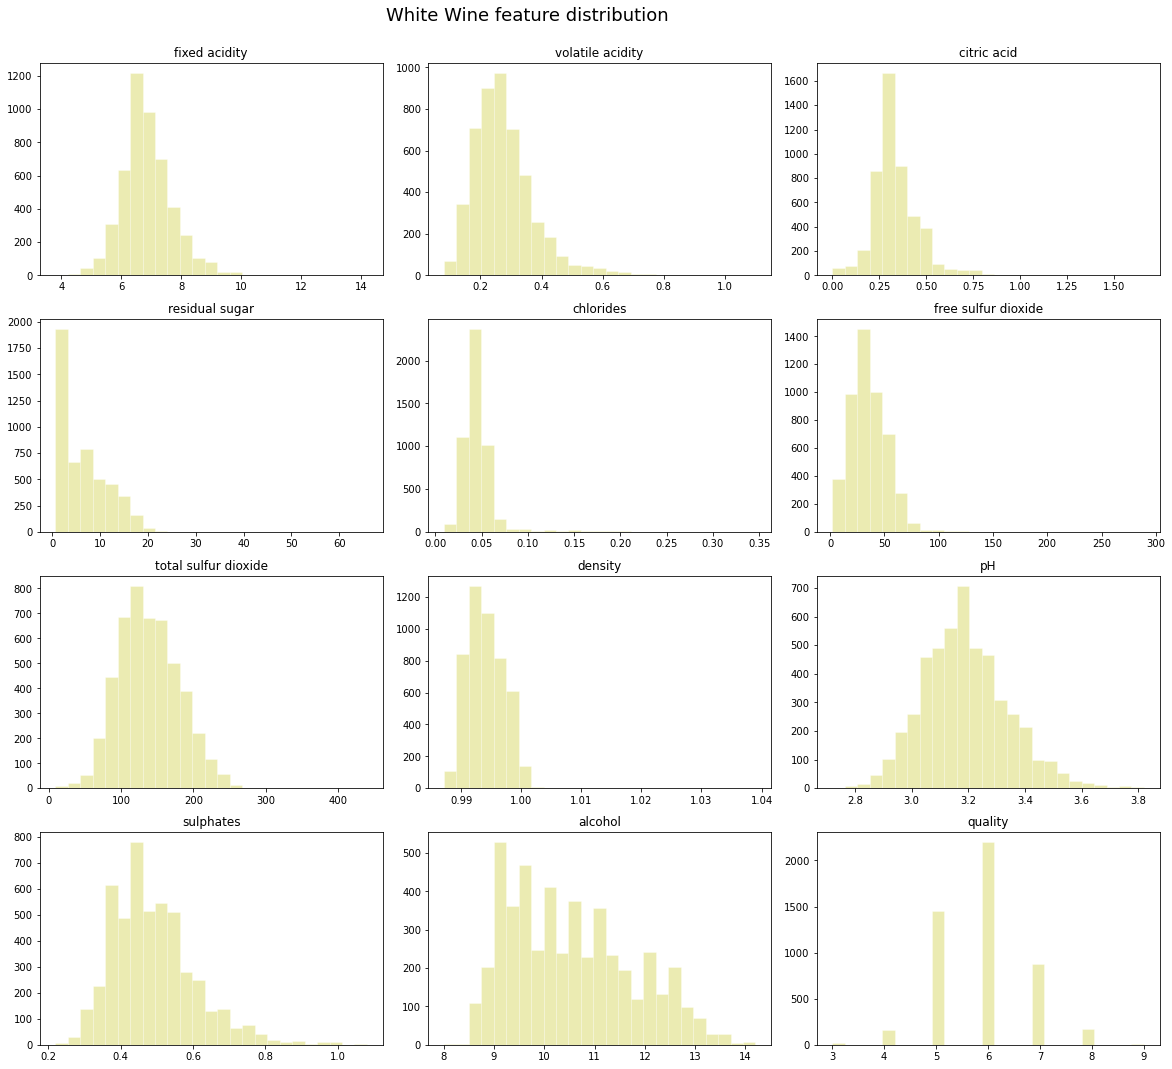

In [17]:
white_wine.hist(bins=25, alpha=0.3, color='y',edgecolor='w',grid=False, figsize=[16.4, 14.8])
plt.suptitle('White Wine feature distribution', x=0.45, y=1, fontsize=18) 
plt.tight_layout() 

### Residual sugar content comparassion

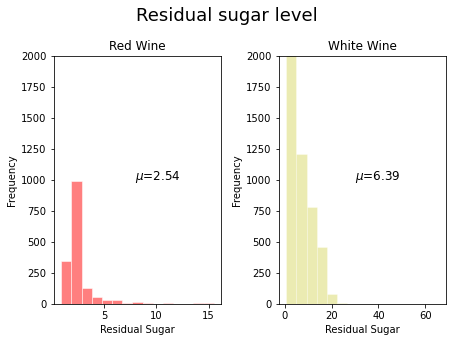

In [53]:
fig = plt.figure()
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.set_ylim([0,2000])
ax2.set_ylim([0,2000])
ax1.set_title('Red Wine')
ax1.set_xlabel('Residual Sugar')
ax1.set_ylabel('Frequency') 
ax2.set_title('White Wine')
ax2.set_xlabel('Residual Sugar')
ax2.set_ylabel('Frequency') 

red_wine['residual sugar'].hist(bins=15, alpha=0.5, color='r', edgecolor='w',grid=False, figsize=[6.4, 4.8], ax=ax1)
white_wine['residual sugar'].hist(bins=15, alpha=0.3, color='y', edgecolor='w',grid=False, figsize=[6.4, 4.8], ax=ax2)

ax1.text(8, 1000, r'$\mu$='+str(round(red_wine['residual sugar'].mean(),2)), fontsize=12)
ax2.text(30, 1000, r'$\mu$='+str(round(white_wine['residual sugar'].mean(),2)), fontsize=12)
title = fig.suptitle('Residual sugar level', fontsize=18)

plt.tight_layout() 

### Alcohol content comparassion

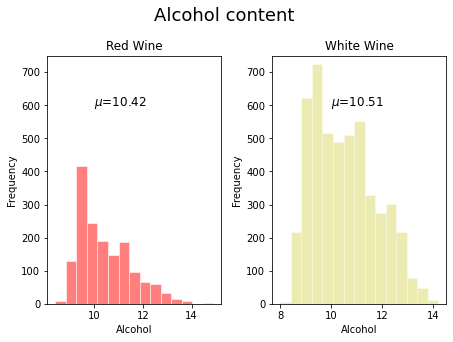

In [49]:
fig = plt.figure()
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.set_ylim([0,750])
ax2.set_ylim([0,750])
ax1.set_title('Red Wine')
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Frequency') 
ax2.set_title('White Wine')
ax2.set_xlabel('Alcohol')
ax2.set_ylabel('Frequency') 

red_wine['alcohol'].hist(bins=15, alpha=0.5, color='r', edgecolor='w',grid=False, figsize=[6.4, 4.8], ax=ax1)
white_wine['alcohol'].hist(bins=15, alpha=0.3, color='y', edgecolor='w',grid=False, figsize=[6.4, 4.8], ax=ax2)

ax1.text(10, 600, r'$\mu$='+str(round(red_wine['alcohol'].mean(),2)), fontsize=12)
ax2.text(10, 600, r'$\mu$='+str(round(white_wine['alcohol'].mean(),2)), fontsize=12)
title = fig.suptitle('Alcohol content ', fontsize=18)

plt.tight_layout()

### Wine type quality distribution

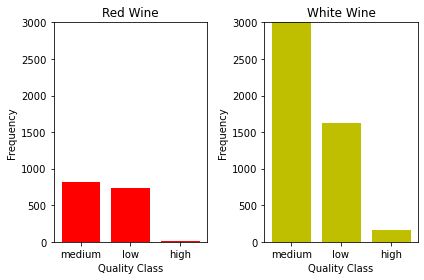

In [51]:
fig = plt.figure()
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.set_ylim([0,3000])
ax2.set_ylim([0,3000])
ax1.set_title('Red Wine')
ax1.set_xlabel('Quality Class')
ax1.set_ylabel('Frequency') 
ax2.set_title('White Wine')
ax2.set_xlabel('Quality Class')
ax2.set_ylabel('Frequency') 

red_wine_quality = red_wine['quality_label'].value_counts()
red_wine_quality = (list(red_wine_quality.index), list(red_wine_quality.values))
ax1.bar(list(range(len(red_wine_quality[0]))), red_wine_quality[1], color='r', edgecolor='w', linewidth=1, tick_label =red_wine_quality[0])

white_wine_quality = white_wine['quality_label'].value_counts()
white_wine_quality = (list(white_wine_quality.index), list(white_wine_quality.values))
ax2.bar(list(range(len(white_wine_quality[0]))), white_wine_quality[1], color='y', edgecolor='w', linewidth=1, tick_label =white_wine_quality[0])

plt.tight_layout()

### Multivariate analysis- confusion matrix

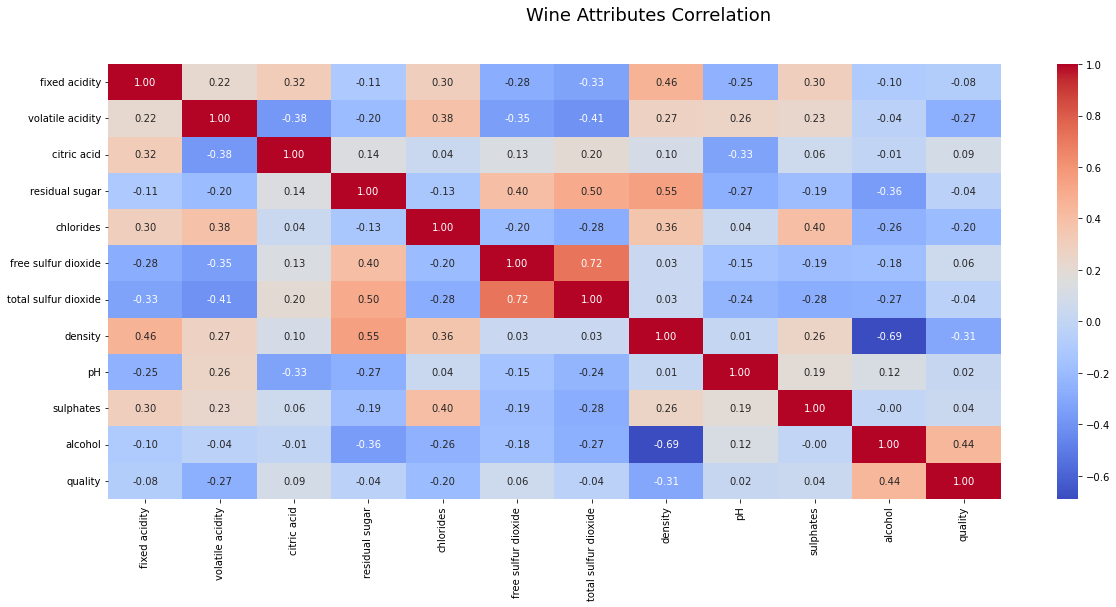

In [58]:
f, ax = plt.subplots(figsize=(20, 8))
corr = wines.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f')
t= f.suptitle('Wine Attributes Correlation', fontsize=18)

###   Visualizing relationships between wine type, quality ratings, volatile acidity, and alcohol volume levels.


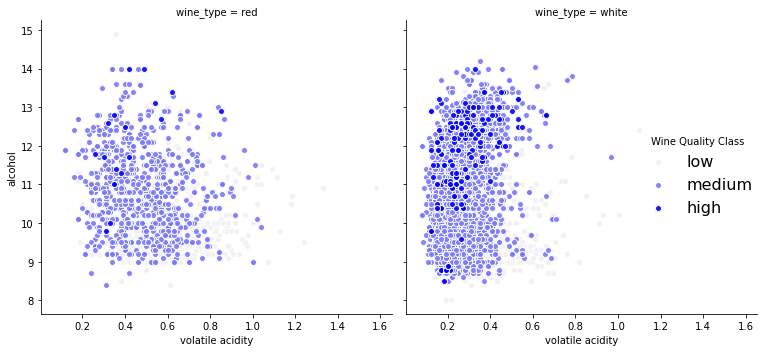

In [107]:
relationships = sns.FacetGrid(wines, col='wine_type', hue='quality_label', 
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=0.9, height=5,palette=sns.light_palette('blue', 3))
relationships.map(plt.scatter, 'volatile acidity', 'alcohol', alpha=0.9, edgecolor='white')
l = relationships.add_legend(title='Wine Quality Class',fontsize=16)

plt.tight_layout()